<a href="https://colab.research.google.com/github/SWAGAT2550/project_datasci/blob/main/sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv")
df.head(10)


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [ ]:
df.describe

<bound method NDFrame.describe of                                                  Month  Perrin Freres monthly champagne sales millions ?64-?72
0                                              1964-01                                             2815.0     
1                                              1964-02                                             2672.0     
2                                              1964-03                                             2755.0     
3                                              1964-04                                             2721.0     
4                                              1964-05                                             2946.0     
..                                                 ...                                                ...     
102                                            1972-07                                             4298.0     
103                                            1972-08                        

In [ ]:
df.columns=["months","sales"]
df.head(10)

,months,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [ ]:
df.drop(105,axis=0,inplace=True)


In [ ]:
df.tail

<bound method NDFrame.tail of                                                 months   sales
0                                              1964-01  2815.0
1                                              1964-02  2672.0
2                                              1964-03  2755.0
3                                              1964-04  2721.0
4                                              1964-05  2946.0
..                                                 ...     ...
101                                            1972-06  5312.0
102                                            1972-07  4298.0
103                                            1972-08  1413.0
104                                            1972-09  5877.0
106  Perrin Freres monthly champagne sales millions...     NaN

[106 rows x 2 columns]>

In [ ]:
df.drop(106,axis=0,inplace=True)

In [ ]:
df.tail

<bound method NDFrame.tail of       months   sales
0    1964-01  2815.0
1    1964-02  2672.0
2    1964-03  2755.0
3    1964-04  2721.0
4    1964-05  2946.0
..       ...     ...
100  1972-05  4618.0
101  1972-06  5312.0
102  1972-07  4298.0
103  1972-08  1413.0
104  1972-09  5877.0

[105 rows x 2 columns]>

In [ ]:
df["months"]=pd.to_datetime(df["months"])

In [ ]:
df.head(10)

,months,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
5,1964-06-01,3036.0
6,1964-07-01,2282.0
7,1964-08-01,2212.0
8,1964-09-01,2922.0
9,1964-10-01,4301.0


In [ ]:
df.set_index('months',inplace=True)
df.head(10)

,sales
months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
1964-06-01,3036.0
1964-07-01,2282.0
1964-08-01,2212.0
1964-09-01,2922.0


In [ ]:
df.describe

<bound method NDFrame.describe of              sales
months            
1964-01-01  2815.0
1964-02-01  2672.0
1964-03-01  2755.0
1964-04-01  2721.0
1964-05-01  2946.0
...            ...
1972-05-01  4618.0
1972-06-01  5312.0
1972-07-01  4298.0
1972-08-01  1413.0
1972-09-01  5877.0

[105 rows x 1 columns]>

Visualize the Data


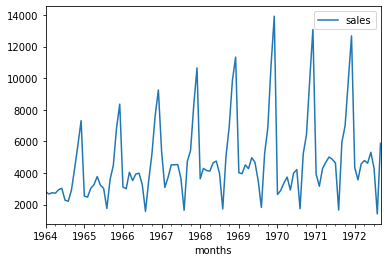

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['sales'])

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print(" stationary")
    else:
        print(" non-stationary")

In [ ]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
 non-stationary


In [ ]:
df['Sales First Difference'] = df['sales'] - df['sales'].shift(1)

In [ ]:
df['sales'].shift(1)

months
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [ ]:
# our data looks seasonal so we need to shift the data for 12 months

df['Seasonal First Difference']=df['sales']-df['sales'].shift(12)


In [ ]:
df.tail(20)

,sales,Sales First Difference,Seasonal First Difference
months,,,
1971-02-01,3162.0,-772.0,263.0
1971-03-01,4286.0,1124.0,916.0
1971-04-01,4676.0,390.0,936.0
1971-05-01,5010.0,334.0,2083.0
1971-06-01,4874.0,-136.0,888.0
1971-07-01,4633.0,-241.0,416.0
1971-08-01,1659.0,-2974.0,-79.0
1971-09-01,5951.0,4292.0,730.0
1971-10-01,6981.0,1030.0,557.0


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna()) 

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
 stationary


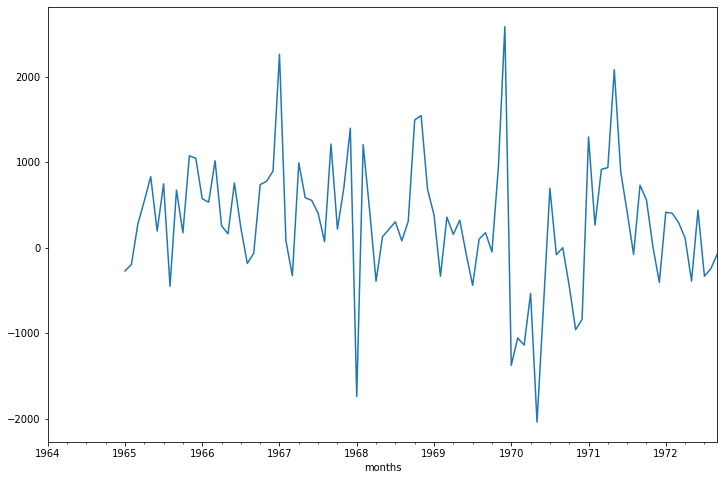

In [ ]:
df['Seasonal First Difference'].plot(figsize =(12,8))

Auto Regressive Model



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

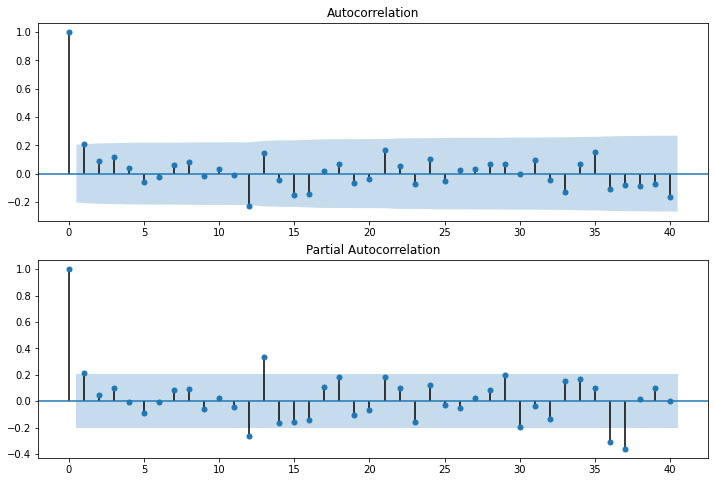

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


In [ ]:
#For non-seasonal data
#p=1, d=1, q=0 or 1
#d = 1 beacause only one thime we shifted the seasonal diffrence
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


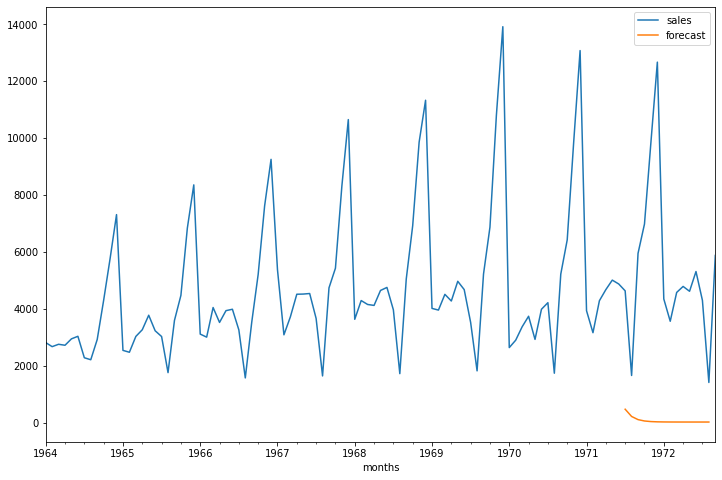

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

# as it is  seasonal our mmodel doesnot perform well

In [ ]:
#now we need to use SARIMAX

model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


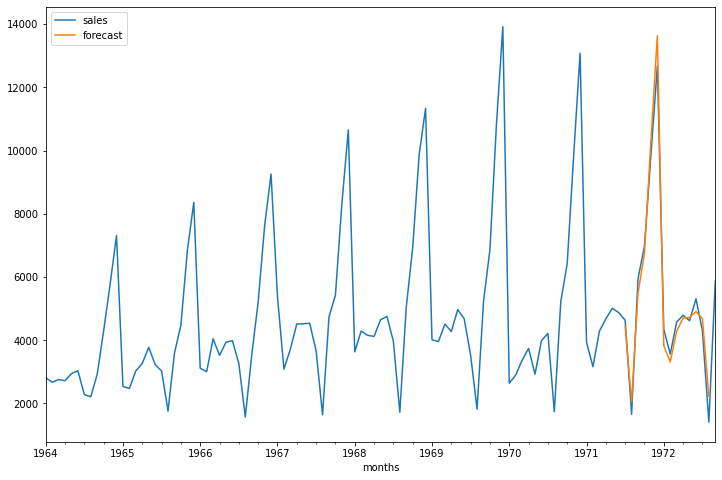

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
# we are making a dataset for the future prediction

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.head()

,sales,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN


In [ ]:
future_datest_df.tail()

,sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

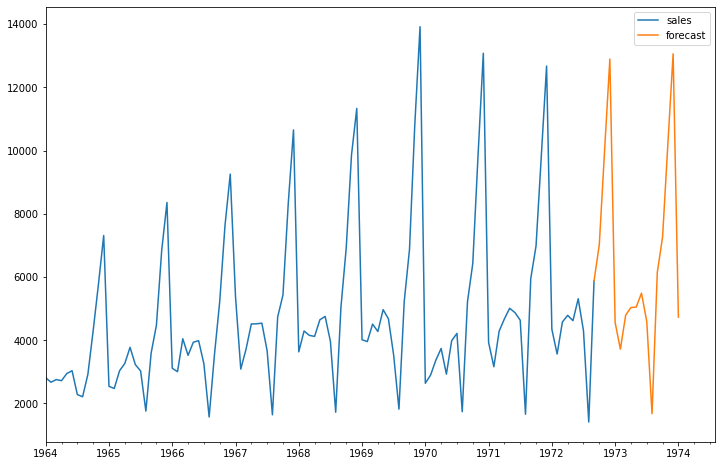

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8))

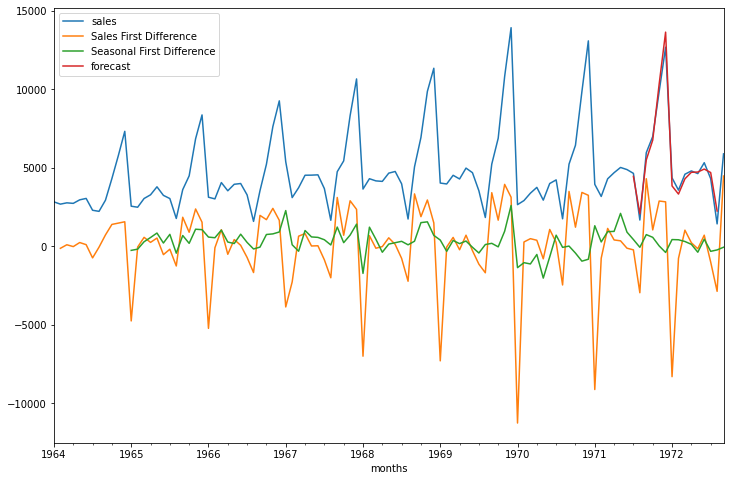

In [ ]:
df.plot(figsize=(12,8))

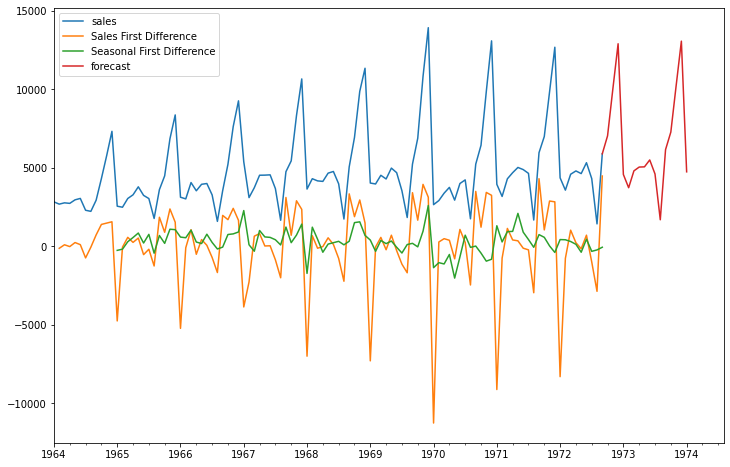

In [ ]:
future_df.plot(figsize=(12,8))